In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
import glob
import pylab as pl
import numpy as np
import matplotlib.animation as animation
import types
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
% matplotlib inline

nc_filename=glob.glob('*_ptrc_T*.nc')
print("found *.nc file: \n{}".format(nc_filename))

found *.nc file: 
['Off_1y_20020101_20021231_ptrc_T.nc', 'CindyOff_1d_20100101_20100101_ptrc_T.nc', 'Off_1d_20030106_20030115_ptrc_T.nc', 'Off_1d_20030101_20030110_ptrc_T.nc', 'Off_1m_20020101_20020201_ptrc_T.nc', 'Off_1m_20020101_20021231_ptrc_T.nc']


In [20]:
ptrc=nc.Dataset(nc_filename[2])
print 'filename:%s'%nc_filename[2]
nav_lon=ptrc.variables['nav_lon'][:]
nav_lat=ptrc.variables['nav_lat'][:]
TR_7=ptrc.variables['TR_7'][:]
TR_9=ptrc.variables['TR_9'][:]
TR_8=ptrc.variables['TR_8'][:]
TR_7=np.ma.masked_where(TR_7<= 0, TR_7)
TR_8=np.ma.masked_where(TR_8<= 0, TR_8)
TR_9=np.ma.masked_where(TR_9<= 0, TR_9)
TR_7=np.ma.masked_where(np.isnan(TR_7),TR_7)
TR_8=np.ma.masked_where(np.isnan(TR_8),TR_8)
TR_9=np.ma.masked_where(np.isnan(TR_9),TR_9)
print TR_7[2,2,:,:].max()
print TR_7[2,2,:,:].min()

/home/xiaoxiny/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in less_equal
/home/xiaoxiny/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in less_equal


filename:Off_1d_20030106_20030115_ptrc_T.nc
inf
0.0208874


/home/xiaoxiny/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in less_equal


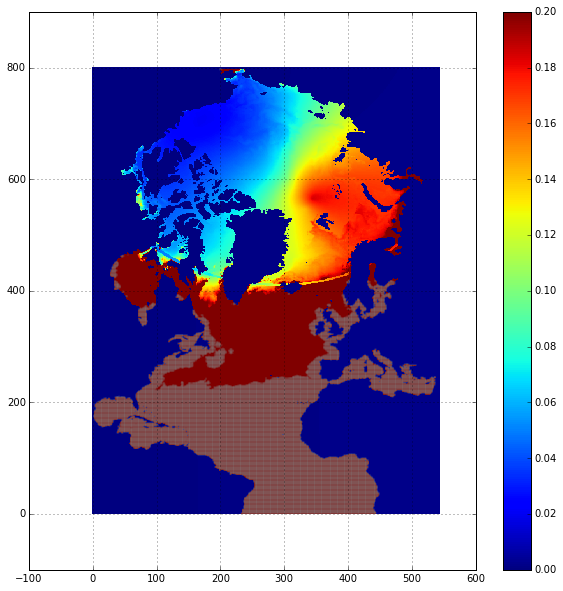

In [28]:
ii=[]
jj=[]
for i in range (len(TR_7[0,2,:,0])):
    for j in range (len(TR_7[0,2,0,:])):
        if TR_7[0,2,i,j]>1e20:
            ii.append(i)
            jj.append(j)


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.pcolor(TR_7[0,2,:,:])
plt.colorbar()
plt.clim([0.0,0.2])
plt.scatter(jj,ii,alpha=0.1,color='grey',s=1)
#plt.xlim([0,544])
plt.grid(True)
plt.show()

In [4]:
def plot_mytrc(filenum):
    ptrc=nc.Dataset(nc_filename[filenum])
    print 'filename:%s'%nc_filename[filenum]
    nav_lon=ptrc.variables['nav_lon'][:]
    nav_lat=ptrc.variables['nav_lat'][:]
    TR_7=ptrc.variables['TR_7'][:]
    TR_9=ptrc.variables['TR_9'][:]
    TR_8=ptrc.variables['TR_8'][:]
    TR_7=np.ma.masked_where(TR_7<= 0, TR_7)
    TR_8=np.ma.masked_where(TR_8<= 0, TR_8)
    TR_9=np.ma.masked_where(TR_9<= 0, TR_9)
    #TR_7=np.ma.masked_where(TR_7== 1e20, TR_7)
    #TR_8=np.ma.masked_where(TR_8== 1e20, TR_8)
    #TR_9=np.ma.masked_where(TR_9== 1e20, TR_9)
    TR_7=np.ma.masked_where(np.isnan(TR_7),TR_7)
    TR_8=np.ma.masked_where(np.isnan(TR_8),TR_8)
    TR_9=np.ma.masked_where(np.isnan(TR_9),TR_9)
    fig = plt.figure(figsize=(20,10))
    for j in range (len(TR_7[:,0,0,0])):
        ax = fig.add_subplot(2,5,j+1)
        plt.pcolor(TR_7[j,2,:,:])
        print 'TR_7'
        plt.title('t=%s'%(j+0.5))
        plt.colorbar()
        #plt.clim([0.0,0.2])
    plt.show()

/home/xiaoxiny/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in less_equal
/home/xiaoxiny/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in less_equal


filename:Off_1d_20030101_20030110_ptrc_T.nc


/home/xiaoxiny/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in less_equal


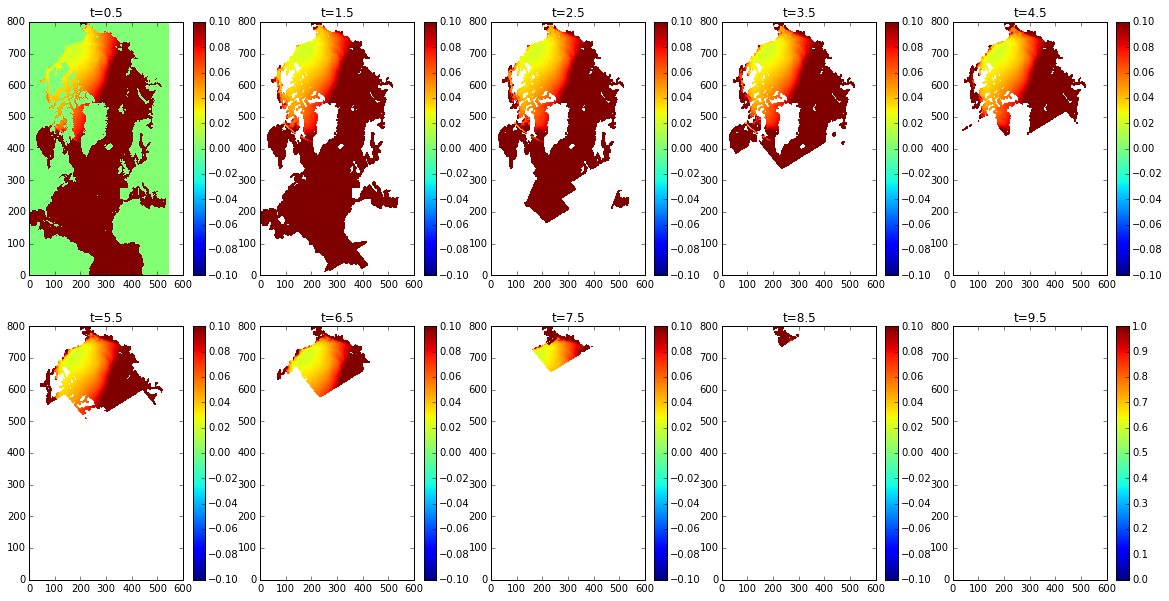

In [14]:
plot_mytrc(3)

/home/xiaoxiny/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in less_equal
/home/xiaoxiny/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in less_equal


filename:Off_1d_20030106_20030115_ptrc_T.nc


/home/xiaoxiny/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in less_equal


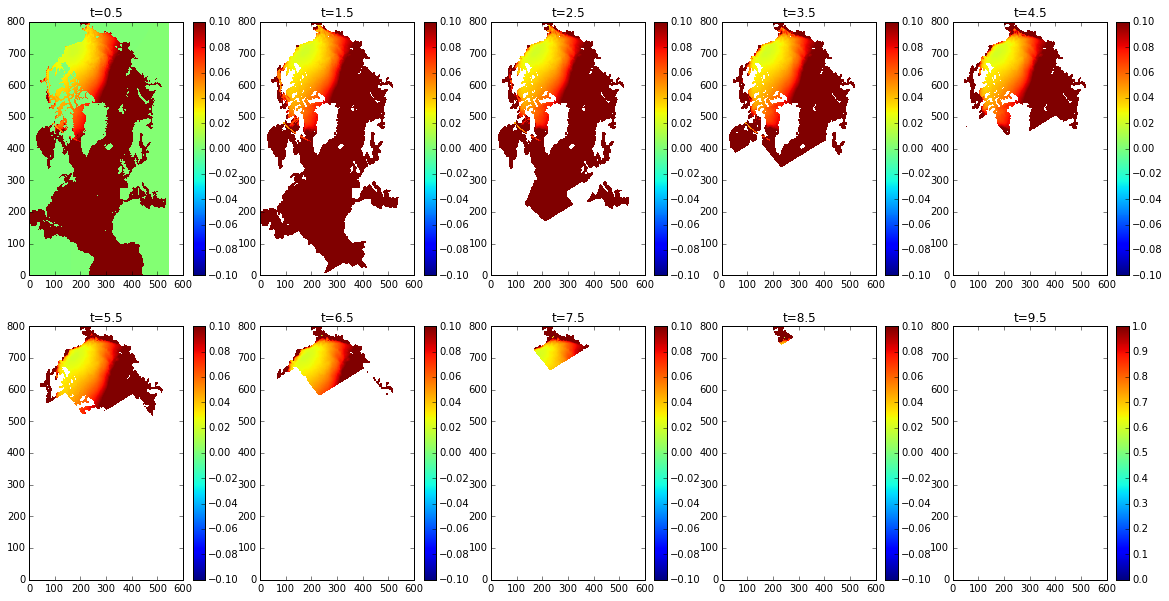

In [15]:
plot_mytrc(2)

In [46]:
def plot_mytrc():
    nc_filename=glob.glob('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/data*.nc')
    fig = plt.figure(figsize=(20,8))
    for j in range(len(nc_filename)):
        ptrc=nc.Dataset(nc_filename[j])
        trc=['Pa_part','Pa_diss','Th_diss','Th_part','desorption_rate']
        nav_lon=ptrc.variables['nav_lon'][:]
        nav_lat=ptrc.variables['nav_lat'][:]
        data=ptrc.variables[trc[j]][:]
        ax = fig.add_subplot(1,5,j+1)
        if trc[j]=='desorption_rate':
            plt.pcolor(data[0,:,:])
        else:
            plt.pcolor(data[0,2,:,:])
        plt.title('Initial %s'%trc[j])
        plt.colorbar()
    #plt.clim([0.0,0.2])
    plt.show()

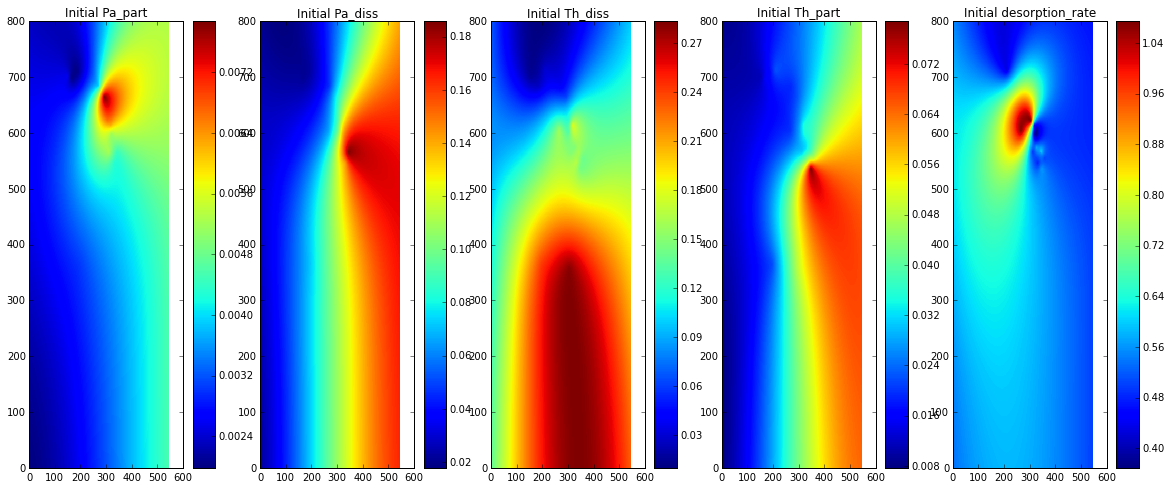

In [47]:
plot_mytrc()

In [31]:
def plot_inf(filenum,trc):
    ptrc=nc.Dataset(nc_filename[filenum])
    print 'filename:%s'%nc_filename[filenum]
    nav_lon=ptrc.variables['nav_lon'][:]
    nav_lat=ptrc.variables['nav_lat'][:]
    TR_7=ptrc.variables['TR_7'][:]
    TR_9=ptrc.variables['TR_9'][:]
    TR_8=ptrc.variables['TR_8'][:]
    TR_7=np.ma.masked_where(TR_7<= 0, TR_7)
    TR_8=np.ma.masked_where(TR_8<= 0, TR_8)
    TR_9=np.ma.masked_where(TR_9<= 0, TR_9)
    #TR_7=np.ma.masked_where(TR_7== 1e20, TR_7)
    #TR_8=np.ma.masked_where(TR_8== 1e20, TR_8)
    #TR_9=np.ma.masked_where(TR_9== 1e20, TR_9)
    TR_7=np.ma.masked_where(np.isnan(TR_7),TR_7)
    TR_8=np.ma.masked_where(np.isnan(TR_8),TR_8)
    TR_9=np.ma.masked_where(np.isnan(TR_9),TR_9)
    data=trc
    ii=[]
    jj=[]
    for i in range (len(TR_7[0,2,:,0])):
        for j in range (len(TR_7[0,2,0,:])):
            if data[0,2,i,j]>1e20:
                ii.append(i)
                jj.append(j)
    fig = plt.figure(figsize=(20,10))
    for j in range (len(TR_7[:,0,0,0])):
        ax = fig.add_subplot(2,5,j+1)
        plt.pcolor(data[j,2,:,:])
        plt.colorbar()
        plt.scatter(jj,ii,alpha=0.1,color='grey',s=1)
        plt.title('t=%s'%(j+0.5))
        #plt.clim([0.0,0.2])
    plt.show()

/home/xiaoxiny/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in less_equal
/home/xiaoxiny/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in less_equal


filename:Off_1d_20030101_20030110_ptrc_T.nc


/home/xiaoxiny/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in less_equal


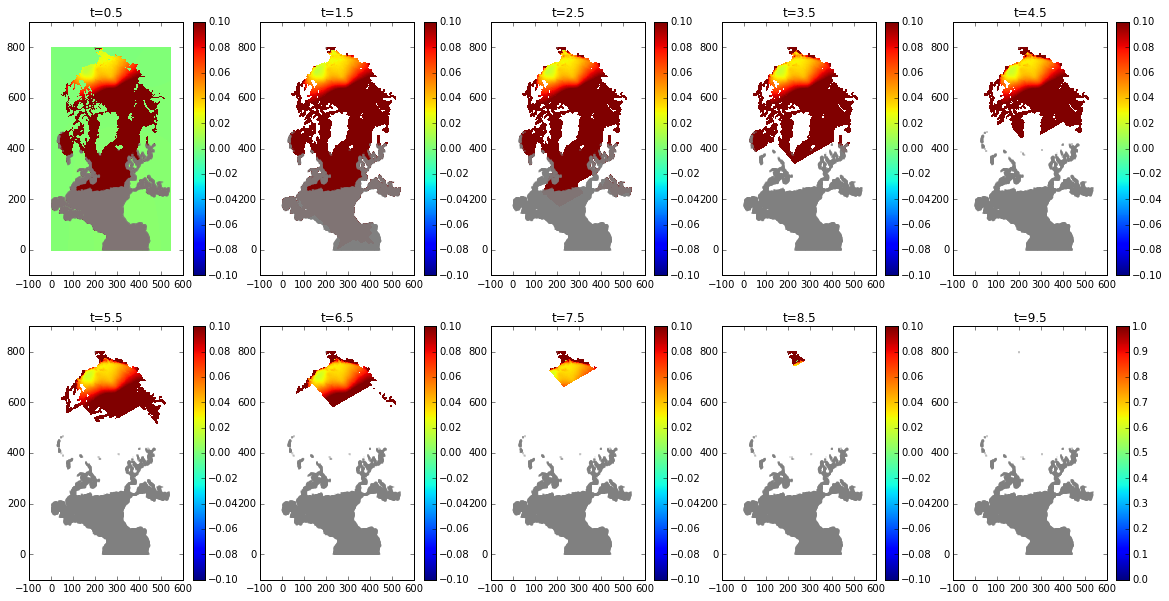

In [32]:
plot_inf(3,TR_8)

/home/xiaoxiny/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in less_equal
/home/xiaoxiny/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in less_equal


filename:Off_1d_20030106_20030115_ptrc_T.nc


/home/xiaoxiny/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in less_equal


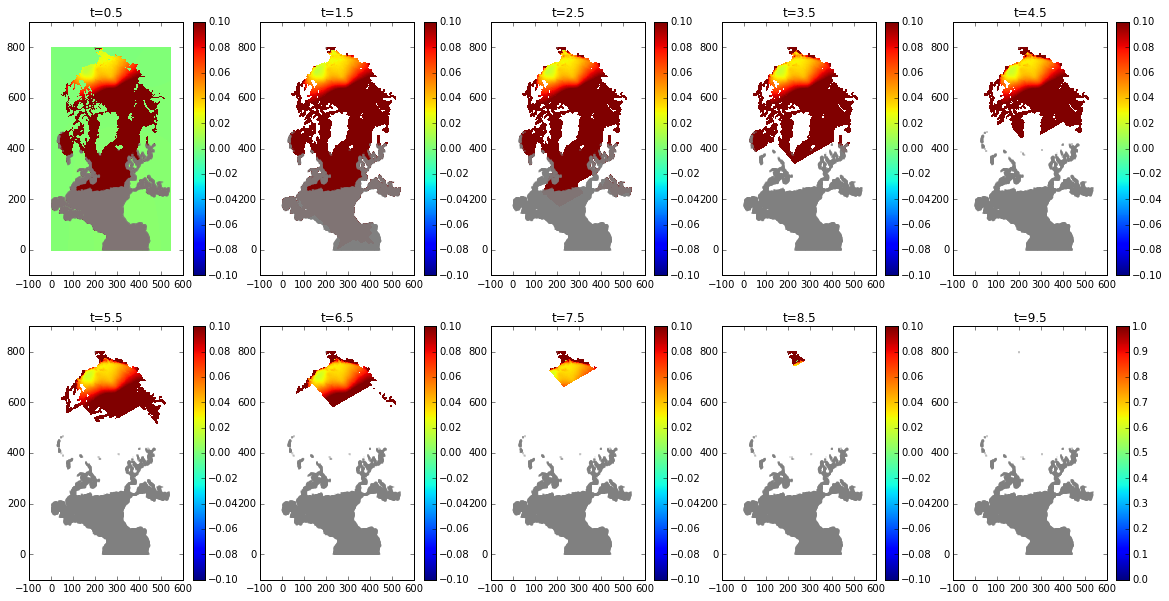

In [33]:
plot_inf(2,TR_8)

/home/xiaoxiny/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in less_equal
/home/xiaoxiny/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in less_equal


filename:Off_1d_20030106_20030115_ptrc_T.nc


/home/xiaoxiny/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in less_equal


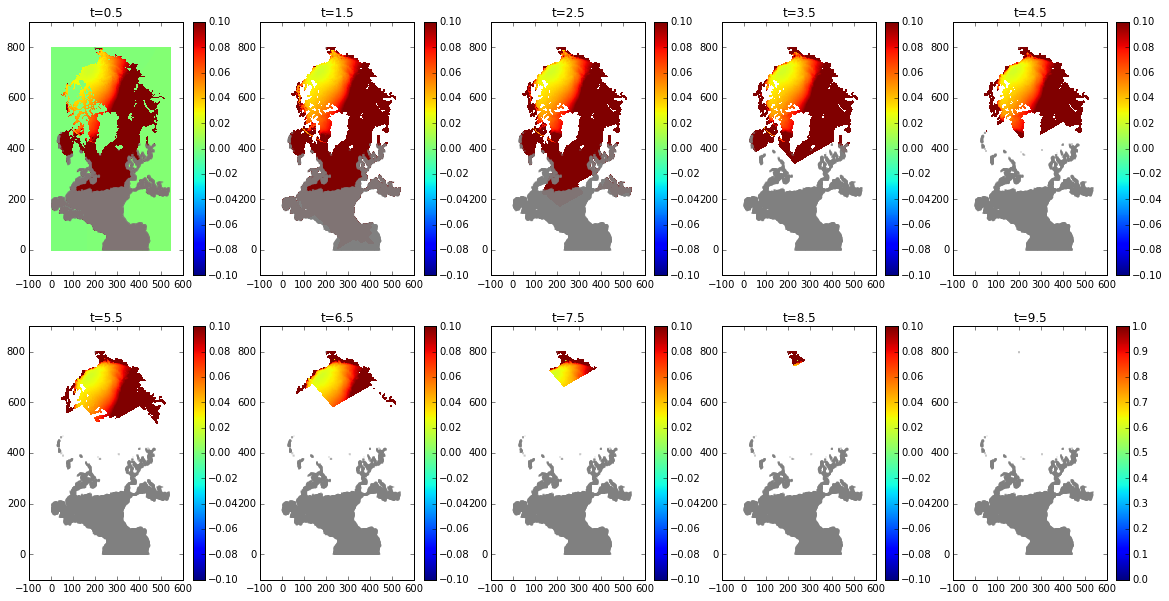

In [34]:
plot_inf(2,TR_7)

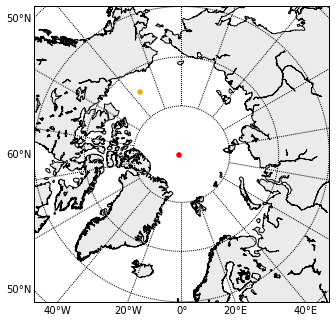

In [9]:
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(133)
# Some 2D arrays to plot (time,x,y)
data=TR_7#/1e6
data2=TR_8#/1e6
i=0
layer=25

#mask data in fram strait
#for k in range(len(nav_lon[:,0])):
#    for j in range(len(nav_lon[0,:])):
#        if (nav_lon[k,j]<=0) and (nav_lon[k,j]>=-20):
#            data2[i,layer,k,j]=np.ma.masked
#        if (nav_lon[k,j]>=0) and (nav_lon[k,j]<=20):
#            data2[i,layer,k,j]=np.ma.masked
#        if (nav_lon[k,j]<=0) and (nav_lon[k,j]>=-20):
#            data[i,layer,k,j]=np.ma.masked
#        if (nav_lon[k,j]>=0) and (nav_lon[k,j]<=20):
#            data[i,layer,k,j]=np.ma.masked

m = Basemap(projection='npstere',boundinglat=60,lon_0=-0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
x, y = m(nav_lon, nav_lat)
m.scatter(x[600,300],y[600,300],color='red')
m.scatter(x[700,200],y[700,200],color='orange')
plt.show()